# Homework 5

## FINM 35700 - Spring 2024

### UChicago Financial Mathematics

### Due Date: 2024-05-07

* Alex Popovici
* alex.popovici@uchicago.edu

This homework relies on following symbology & data files, as of 2024-04-26.

HYG ETF corporate bonds:
- the HYG bond symbology file `hyg_bond_symbology`, 
- the HYG basket composition file (containing bond weights and yields) `hyg_basket_composition`,

SOFR OIS swaps:
- the SOFR OIS swaps symbology file (for hyg basket) `sofr_swaps_symbology`,
- the SOFR OIS swaps market data file `sofr_swaps_market_data_eod`,

CDX Index:
- the CDX Index symbology file (for hyg basket) `cdx_symbology`,
- the CDX Index basket composition file `cdx_basket_composition`,


## Scoring: Total of 100 points

| Problem | Points |
|---------|--------|
| 1       | 20     |
| 2       | 20     |
| 3       | 30     |
| 4       | 30     |

In [1]:
# import tools from previous homeworks
from credit_market_tools import *

# Use static calculation/valuation date of 2024-04-19, matching data available in the market prices EOD file
calc_date = ql.Date(25, 4, 2024)
ql.Settings.instance().evaluationDate = calc_date

# Calculation/valuation date as pd datetime
as_of_date = pd.to_datetime('2024-04-25')

-----------------------------------------------------------
# Problem 1: Fixed rate bond prices and sensitivities (bond yield model)

## When computing sensitivities, assume "everything else being equal" (ceteris paribus).

For a better understanding of dependencies, you can use the fixed rate bond valuation formula in the flat yield model (formula [6] in Lecture 1).

\begin{align}
PV_{Bond}\left(c,T,y_{sa} \right)=1+\frac{c-y_{sa}}{y_{sa}}\cdot\left[1-\left(1+\frac{y_{sa}}{2}\right)^{-2T}\right]
\end{align}


## a. True or False (fixed rate bond prices)

1. Fixed rate bond price is increasing in yield.
    - False - the opposite is the case, sinc the DV01 is positive!
2. Fixed rate bond price is increasing in coupon
    - True.
3. Fixed rate bond price is increasing in bond maturity
    - False - this is only the case when $c-y_{sa} > 0$
4. Fixed rate callable bond prices are higher or equal to their "bullet" (non-callable) version.
    - False - the call optionality is on the side of the issuer, not on the side of the investor!

## b. True or False (fixed rate bond yields)

1. Fixed rate bond yield is increasing in interest rate
    - True, assuming all else equal (credit spread unchanged).
2. Fixed rate bond yield is increasing in credit spread
    - True, assuming all else equal (interest rate unchanged)..
3. Fixed rate bond yield is increasing in coupon
    - False: coupon and yield are independent parameters of the model
4. Fixed rate bond yield is increasing in bond maturity
    - False, it depends on the slope of the yield curve.
5. Fixed rate callable bond yields are lower or equal to their "bullet" (non-callable) version.
    - True: in the sense that the "yield to worst" for callable bonds is lower or equal to the "yield to maturity".

## c. True or False (fixed rate bond durations)

1. Fixed rate bond duration is increasing with yield
    - False, the opposite is the case.
2. Fixed rate bond duration is increasing in coupon
    - False, the opposite is the case.
3. Fixed rate bond duration is increasing with bond maturity
    - True, since duration is a weighted sum of cashflow time-to-maturies.
4. Fixed rate callable bond durations are higher or equal to their "bullet" (non-callable) version.
    - False, the opposite is the case, since the "workout date" for callable bonds is lower or equal to the maturity date.


## d. True or False (fixed rate bond convexities)

1. Fixed rate bond convexity is increasing with yield
    - False, the opposite is the case.
2. Fixed rate bond convexity is increasing in coupon
    - False, the opposite is the case.
3. Fixed rate bond convexity is increasing with bond maturity
    - True, since convexity is a weighted sum of cashflow time-to-maturies squared.
4. Fixed rate callable bond convexities are higher or equal to their "bullet" (non-callable) version.
    - False, the opposite is the case.


-----------------------------------------------------------
# Problem 2: Credit Default Swaps (hazard rate model)

## When computing sensitivities, assume "everything else being equal" (ceteris paribus).

For a better understanding of dependencies, you can use the CDS valuation formulas in the simple hazard rate model (formulas[43] and [44] in Lecture 3).

\begin{align}
PV_{CDS\_PL}\left(c,r,h,R,T\right) = \frac{c}{4 \cdot \left(e^{\left(r+h\right)/4}-1 \right)} \cdot\left[1-e^{-T\cdot\left(r+h\right)}\right] \simeq \frac{c}{r+h} \cdot\left[1-e^{-T\cdot\left(r+h\right)}\right]
\end{align}

\begin{align}
PV_{CDS\_DL}\left(c,r,h,R,T\right) = \frac{\left(1-R\right)\cdot h}{r+h} \cdot\left[1-e^{-T\cdot\left(r+h\right)}\right]
\end{align}

\begin{align}
PV_{CDS} = PV_{CDS\_PL} - PV_{CDS\_DL} \simeq \frac{c - \left(1-R\right)\cdot h}{r+h} \cdot\left[1-e^{-T\cdot\left(r+h\right)}\right]
\end{align}

\begin{align}
CDS\_ParSpread = c \cdot \frac{PV_{CDS\_DL}}{PV_{CDS\_PL}} \simeq \left(1-R\right)\cdot h
\end{align}


## a. True or False (CDS Premium Leg PV)

1. CDS premium leg PV is increasing in CDS Par Spread
    - False, the opposite is the case.
2. CDS premium leg PV is increasing in interest rate
    - False, the opposite is the case.
2. CDS premium leg PV is increasing in hazard rate
    - False, the opposite is the case.
3. CDS premium leg PV is increasing in recovery rate
    - False, premium leg is independent of recovery rate.
4. CDS premium leg PV is increasing in coupon
    - True, premium leg PV is linear in coupon.
5. CDS premium leg PV is increasing in CDS maturity
    - True, more coupons are being added by extending the maturity.


## b. True or False (CDS Default Leg PV)

1. CDS default leg PV is increasing in CDS Par Spread
    - True, since the credit default risk increases.
2. CDS default leg PV is increasing in interest rate
    - False, the opposite is the case, since the risk-free discount factors decrease.
3. CDS default leg PV is increasing in hazard rate
    - True, since the credit default risk increases.
4. CDS default leg PV is increasing in recovery rate
    - False, the opposite is the case, since the expecte loss decreases.
5. CDS default leg PV is increasing in coupon
    - False, default leg is independent of the coupon.
6. CDS default leg PV is increasing in CDS maturity
    - True, since additional default risk is being added by extending the maturity.

## c. True or False (CDS PV)

1. CDS PV is increasing in CDS Par Spread
    - False, the opposite is the case, since the credit default risk increases.
2. CDS PV is increasing in interest rate
    - False, the opposite is the case, since the credit default risk increases.
3. CDS PV is increasing in hazard rate
    - False, the opposite is the case, since the credit default risk increases.
4. CDS PV is increasing in recovery rate
    - True, the opposite is the case, since the expected recovery increases.
5. CDS PV is increasing in coupon
    - True, since the premium leg PV increases
6. CDS PV is increasing in CDS maturity
    - False, this is only the case if CDS coupon > CDS Par Spread.

## d. True or False (CDS Par Spread)


1. CDS Par Spread is increasing in interest rates
    - False, no general statement can be made.
2. CDS Par Spread is increasing in hazard rate
    - True, CDS_Par_Spread ~= Hazard_Rate x (1 - Recovery)
3. CDS Par Spread is increasing in recovery rate
    - False, the opposite is the case
4. CDS Par Spread is increasing in coupon
    - Flase, CDS Par Spread is independent of the coupon
5. CDS Par Spread is increasing in CDS maturity
    - False, for distressed issuers the opposite is the case (credit risk is concentraded in the fron end of the curve)

-----------------------------------------------------------
# Problem 3: Pricing bonds in the Merton Structural Credit Model
## Follow Lecture 5, "Structural Credit Default Models"

## a. Company balance sheet metrics & fair value of equity
- Assets of $125 MM
- Liabilities of $100 MM face value, consisting of one zero coupon bond.
- Bond maturity is at T = 5 years
- Asset volatility at 20% (log-normal annualized vol)
- Flat risk-free interest rates of 4%

Compute the company Leverage, "Book Value of Equity" and fair value of equity metrics.


\begin{align}
E_{0}=e^{-r\cdot T}\cdot\mathbb{E}\left[\left(A_{T}-K\right)^{+}|\mathcal{F}_{0}\right]
\end{align}

\begin{align}
=Call\left(A_{0},K,T,\sigma_{A},r,\right)
\end{align}

\begin{align}
=A_{0}\cdot\Phi\left(d_{+}\right)-e^{-r\cdot T}\cdot K\cdot\Phi\left(d_{-}\right)
\end{align}

\begin{align}
d_{\pm}=\frac{-\log\left(L_{0}\right)+\left(r\pm\frac{1}{2}\sigma_{A}^{2}\right)\cdot T}{\sigma_{A}\cdot\sqrt{T}}
\end{align}


In [2]:
from scipy.stats import norm

def calc_d1_d2(A,r,sigma_A,T,L):
    d1 = (-np.log(L/A) + (r + 0.5 * sigma_A**2)* T ) / (sigma_A * np.sqrt(T))
    d2 = (-np.log(L/A) + (r - 0.5 * sigma_A**2)* T ) / (sigma_A * np.sqrt(T))    
    return (d1, d2)

def fairValueEquity(A,r,sigma_A,T,L):
    d1, d2 = calc_d1_d2(A,r,sigma_A,T,L)
    E0  = A * norm.cdf(d1) - np.exp(-r * T) * L * norm.cdf(d2)
    return E0


In [3]:
K = 100
A = 125
r = 0.04
T = 5
sigma_A = 0.2

E0 = fairValueEquity(A, r, sigma_A, T, K)
print('Fair value of equity at time 0 (MM):', round(E0, 3))

Fair value of equity at time 0 (MM): 47.234


## b. Risky Bond Valuation (Fair Value of Liabilities)

Compute the fair value of the risky bond.

\begin{align}
B_{0}=e^{-r\cdot T}\cdot\mathbb{E}\left[K-\left(K-A_{T}\right)^{+}|\mathcal{F}_{0}\right]
\end{align}

\begin{align}
=e^{-r\cdot T}\cdot K-Put\left(A_{0},K,T,\sigma_{A},r,\right)
\end{align}

\begin{align}
=A_{0}\cdot\Phi\left(-d_{+}\right)+e^{-r\cdot T}\cdot K\cdot\Phi\left(d_{-}\right)
\end{align}


In [4]:
def fairValueRiskyBond(A,r,sigma_A,T,L):
    d1, d2 = calc_d1_d2(A,r,sigma_A,T,L)
    B0  = A * norm.cdf(-d1) + L * np.exp(-r * T) * norm.cdf(d2)
    
    return B0

In [5]:
B0 = fairValueRiskyBond(A, r, sigma_A, T, K)
print('Fair value of risky bond at time 0 (MM):', round(B0, 3))

print('Check that E0 and B0 add up to A0 (MM):', round(E0 + B0, 3), '=', A)

Fair value of risky bond at time 0 (MM): 77.766
Check that E0 and B0 add up to A0 (MM): 125.0 = 125


## c. Flat yield, spread and hazard rate

Compute the following credit risk metrics:
- Distance to Default
- Default Probability
- Bond Yield
- Bond Credit Spread
- Flat Hazard Rate
- Expected Recovery on Default

Plot separate charts for 
- Bond Credit Spreads and 
- Expected Recovery on Defaults

as a function of initial Asset values, on a grid from $50 MM to $200 MM in steps of $5 MM.

d1, d2 = calc_d1_d2(A0, r, sigma_A, T, K)

In [6]:
def defaultProbability(A,r,sigma_A,T,K):
    d1, d2 = calc_d1_d2(A,r,sigma_A,T,K)
    default_prob = norm.cdf(-d2)
    
    return default_prob

def survivalProbability(A,r,sigma_A,T,L):
    return(1 - defaultProbability(A,r,sigma_A,T,L))

def distanceToDefault(A,r,sigma_A,T,K):
    d1, d2 = calc_d1_d2(A,r,sigma_A,T,K)        
    return(d2)

def riskyBondYield(A,r,sigma_A,T,K):
    B0 = fairValueRiskyBond(A,r,sigma_A,T,K)
    bond_yield = - np.log(B0/K) / T       
    return bond_yield

def riskyBondCreditSpread(A,r,sigma_A,T,K):
    bond_yield = riskyBondYield(A,r,sigma_A,T,K)    
    bond_credit_spread = bond_yield - r
    return bond_credit_spread

def flatHazardRate(A,r,sigma_A,T,K):
    survival_prob = survivalProbability(A,r,sigma_A,T,K)
    flat_hazard_rate = - np.log(survival_prob) / T
    return flat_hazard_rate

def expectedRecoveryRate(A,r,sigma_A,T,K):
    d1, d2 = calc_d1_d2(A,r,sigma_A,T,K)    
    exp_rec_rate = A / K * norm.cdf(-d1)/norm.cdf(-d2)
    return exp_rec_rate


In [7]:
dist_to_default = distanceToDefault(A,r,sigma_A,T,K)
default_prob = defaultProbability(A,r,sigma_A,T,K)
survival_prob = survivalProbability(A,r,sigma_A,T,K)
bond_yield = riskyBondYield(A,r,sigma_A,T,K) * 1e2
bond_credit_spread = riskyBondCreditSpread(A,r,sigma_A,T,K) * 1e4
flat_hazard_rate = flatHazardRate(A,r,sigma_A,T,K) * 1e4
exp_rec_rate = expectedRecoveryRate(A,r,sigma_A,T,K) * 1e2

print('Distance to Default:', round(dist_to_default,3))
print('Default Probability:', round(default_prob, 3))
print('Survival Probability:', round(survival_prob, 3))
print('Bond yield (pct):', round(bond_yield, 3))
print('Bond credit spread (bps):', round(bond_credit_spread, 2))
print('Flat Hazard Rate (bps):', round(flat_hazard_rate, 2))
print('Expected Recovery Rate R (pct):', round(exp_rec_rate, 2))

Distance to Default: 0.723
Default Probability: 0.235
Survival Probability: 0.765
Bond yield (pct): 5.029
Bond credit spread (bps): 102.94
Flat Hazard Rate (bps): 535.69
Expected Recovery Rate R (pct): 64.39


Text(0, 0.5, 'Expected Recovery Rates (pct)')

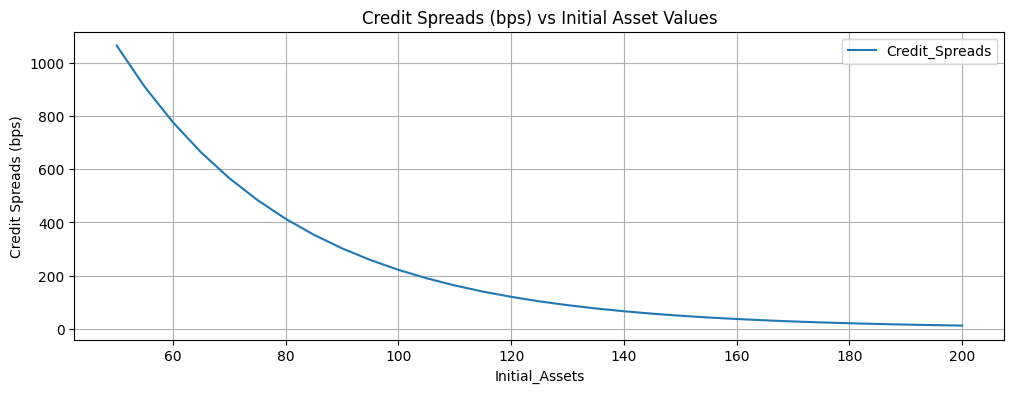

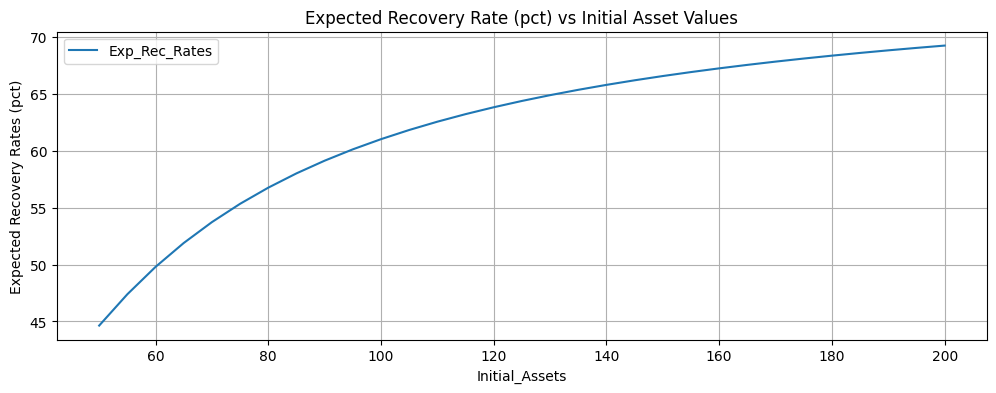

In [19]:
asset_values = [x for x in range(50,205,5)]
credit_spreads = [riskyBondCreditSpread(a,r,sigma_A,T,K) * 1e4 for a in asset_values]
exp_recovery_rates = [expectedRecoveryRate(a,r,sigma_A,T,K) * 1e2 for a in asset_values]


grid_df = pd.DataFrame(data={'Initial_Assets': asset_values, 
                             'Credit_Spreads': credit_spreads,
                             'Exp_Rec_Rates': exp_recovery_rates})  

plt = grid_df.plot(x='Initial_Assets', y='Credit_Spreads', grid=True, title="Credit Spreads (bps) vs Initial Asset Values", figsize=(12,4))
plt.set_ylabel('Credit Spreads (bps)')


plt = grid_df.plot(x='Initial_Assets', y='Exp_Rec_Rates', grid=True, title="Expected Recovery Rate (pct) vs Initial Asset Values", figsize=(12,4))
plt.set_ylabel('Expected Recovery Rates (pct)')


## d. Equity volatility

Compute the Equity Volatility.

What happens to the equity volatility if initial Assets value goes up/down (as of time 0)?

Plot Equity Volatilities of initial Asset values, on a grid from $50 MM to $200 MM in steps of $5 MM.

 

In [15]:
def equityVolatility(A,r,sigma_A,T,K):
    d1, d2 = calc_d1_d2(A,r,sigma_A,T,K)    
    E0 = fairValueEquity(A,r,sigma_A,T,K)    
    sigma_E = (A / E0) * norm.cdf(d1) * sigma_A
    return sigma_E


In [16]:
equity_vol = equityVolatility(A,r,sigma_A,T,K) * 100

print('Equity Volatility (pct):', round(equity_vol, 2))

Equity Volatility (pct): 46.52


Text(0, 0.5, 'Equity Volatility (pct)')

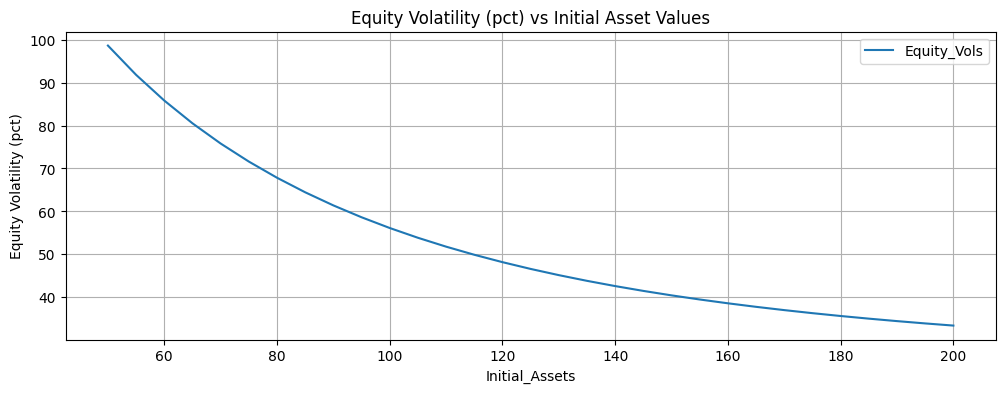

In [18]:
asset_values = [x for x in range(50,205,5)]
equity_volatilities = [equityVolatility(a,r,sigma_A,T,K) * 1e2 for a in asset_values]

grid_df['Equity_Vols'] = equity_volatilities

plt = grid_df.plot(x='Initial_Assets', y='Equity_Vols', grid=True, title="Equity Volatility (pct) vs Initial Asset Values", figsize=(12,4))
plt.set_ylabel('Equity Volatility (pct)')


-----------------------------------------------------------
# Problem 4: Credit ETF analysis on HYG

## a. Load and explore the HYG basket composition and market data

Load the `hyg_basket_composition` Excel file into a dataframe. It contains the HYG basket constituent face notionals, weights and yields-to-maturities as of 2024-04-26.

Load the `hyg_corp_symbology` Excel file into a dataframe. It contains the corporate bond details for HYG constituents.

How many corporate bonds are in the HYG basket?  What are the average and median face notionals for a bond?

How many unique tickers are in the HYG basket? What are the average and median face notionals for a ticker?

Compute mean, median and standard deviation of yields-to-maturity of bonds in the basket.

In [ ]:
# hyg_corp_symbology
hyg_corp_symbology = pd.read_excel('data/hyg_corp_symbology.xlsx')

# Load HYG basket composition file, keep only columns needed for pricing
hyg_basket_composition = pd.read_excel('data/hyg_basket_composition.xlsx')
hyg_basket_composition = hyg_basket_composition[['isin', 'midYield', 'face_notional', 'face_notional_weight']]

# hyg_df
hyg_df = hyg_corp_symbology.merge(hyg_basket_composition, how='inner', on=['isin'])
# print(hyg_df.head())

print('Corporate bonds in HYG basket:', hyg_df.shape[0])

print('Average and median face notionals for bonds in HYG basket:')
print(hyg_df['face_notional'].describe()[['mean', '50%']])

print('Number of unique tickers in HYG basket:', len(hyg_df['ticker'].unique()))

print('Average and median face notionals by ticker:')
hyg_by_ticker = hyg_df[['ticker', 'face_notional']].groupby(['ticker']).sum()
print(hyg_by_ticker['face_notional'].describe()[['mean', '50%']])

print('Mean, median and standard deviation of yields (pct):')
print(hyg_df['midYield'].describe()[['mean', '50%', 'std']])



Corporate bonds in HYG basket: 1182
Average and median face notionals for bonds in HYG basket:
mean    1.306189e+07
50%     1.101050e+07
Name: face_notional, dtype: float64
Number of unique tickers in HYG basket: 422
Average and median face notionals by ticker:
mean    3.658568e+07
50%     2.590800e+07
Name: face_notional, dtype: float64
Mean, median and standard deviation of yields (pct):
mean     8.736248
50%      6.907250
std     13.283695
Name: midYield, dtype: float64


## b. Compute the NAV of the HYG basket and the intrinsic price of one ETF share.

Create the bond objects for all constituents of HYG. Compute the dirty price for each bond (from yield-to-maturity).

Aggregate the ETF NAV value (intrisic value of bond basket) as the weighted sum of dirty prices times basket weights. Keep in mind that the resulting ETF NAV will be on a face of $100, since the basket face notional weights add up to 100 percent.

Compute the intrinisc market capitalization of the HYG ETF by scaling the ETF NAV price to the ETF total face notional. 

Divide by 188,700,000 (the number of ETF shared outstanding as of 2024-04-26) to obtain the intrinsic price of one HYG ETF share.

As a reference, the HYG market price as of 2024-04-26 was around $76.59, see the HYG YAS screen below.

![alt text](HYG_Price_Yield_Duration.JPG)

In [ ]:
# face notionals and weights
bond_face_notionals = hyg_df['face_notional']
bond_face_notional_weights = hyg_df['face_notional_weight']

# bond objects and dirty prices
hyg_bond_objects = []
hyg_bond_dirty_prices = []

# ETF intrinsic  NAV and Market Cap
hyg_intrinsic_nav = 0
hyg_intrinsic_market_cap = 0

# loop over bonds
for i, df_row in hyg_df.iterrows():
    # bond_object
    bond_object = create_bond_from_symbology(df_row.to_dict())
    
    # bond_dirty_price                
    bond_yield = df_row['midYield'] / 100
    bond_dirty_price = bond_object.dirtyPrice(bond_yield, ql.Thirty360(ql.Thirty360.USA), ql.Compounded, ql.Semiannual)
    
    # hyg_basket_nav    
    hyg_intrinsic_nav += bond_dirty_price * bond_face_notional_weights[i] / 100
    
    # hyg_basket_market_cap    
    hyg_intrinsic_market_cap += bond_dirty_price * bond_face_notionals[i] / 100
    
    # Populate lists
    hyg_bond_objects.append(bond_object)
    hyg_bond_dirty_prices.append(bond_dirty_price)


# Add dirty prices to hyg_df
hyg_df['dirty_price'] = hyg_bond_dirty_prices
display(hyg_df[['security', 'midYield', 'face_notional', 'dirty_price']].head())

,security,midYield,face_notional,dirty_price
0,AA 5 1/2 12/15/27,6.0125,6130000,100.391080
1,AA 6 1/8 05/15/28,6.2470,6071000,102.356299
2,AA 4 1/8 03/31/29,6.1990,8751000,91.648532
3,AA 7 1/8 03/15/31,6.8105,12292000,102.620205
4,AAL 7 1/4 02/15/28,6.9755,11161000,102.396226


In [ ]:
# Aggregate the ETF NAV value (intrisic value of bond basket) as the weighted sum of dirty prices times basket weights.
print('hyg_intrinsic_nav (on a face of $100):', round(hyg_intrinsic_nav, 2))

# Compute the intrinisc market capitalization of the HYG ETF by scaling the ETF NAV price to the ETF total face notional. 
print('hyg_intrinsic_market_cap (in $BN):', round(hyg_intrinsic_market_cap/1e9, 2))

# Divide by 188,700,000 (the number of ETF shared outstanding as of 2024-04-26) to obtain the intrinsic price of one HYG ETF share.
hyg_number_of_outstanding_etf_shares = 188700000
hyg_intrinsic_price_per_etf_share = hyg_intrinsic_market_cap / hyg_number_of_outstanding_etf_shares
print('hyg_intrinsic_price_per_etf_share:', round(hyg_intrinsic_price_per_etf_share, 2))


hyg_intrinsic_nav (on a face of $100): 93.57
hyg_intrinsic_market_cap (in $BN): 14.45
hyg_intrinsic_price_per_etf_share: 76.56


## c. Compute the ETF yield using the ACF (Aggregated Cash-Flows) method

Create the bond objects for all constituents of HYG. 

Write a function that computes the ETF NAV for a given flat yield y.

Use a numerical root finder (e.g. root_scalar from scipy.optimize) to solve for 

ETF_NAV(yield) = ETF_NAV_Price 

and obtain the ETF yield.

As a reference, the HYG market yield as of 2024-04-26 was around 8.20%.

In [ ]:
def calc_etf_nav_from_yield(etf_yield, hyg_bond_objects, bond_face_notional_weights):
    
    # etf_intrinsic_nav
    etf_intrinsic_nav = 0
    
    # loop over bonds
    for i in range(len(hyg_bond_objects)):
        bond_object = hyg_bond_objects[i]
        # calc bond_dirty_price
        bond_dirty_price = bond_object.dirtyPrice(etf_yield, ql.Thirty360(ql.Thirty360.USA), ql.Compounded, ql.Semiannual)        
        
        # update etf_intrinsic_nav
        etf_intrinsic_nav += bond_dirty_price * bond_face_notional_weights[i] / 100
        
    return(etf_intrinsic_nav)
    

Add root finder wrapper function and solve for ETF yield.

In [ ]:
from scipy.optimize import root_scalar

# etf_nav_from_yield_wrapper
etf_nav_from_yield_wrapper = lambda y: hyg_intrinsic_nav - calc_etf_nav_from_yield(y, hyg_bond_objects, bond_face_notional_weights)

# use 1-dimensional root finder
root_finder_yield_sol = root_scalar(etf_nav_from_yield_wrapper, bracket=[0.001, 0.50], method='brentq', xtol=1e-6)
etf_nav_yield = root_finder_yield_sol.root
print('HYG etf_nav_yield (pct):', round(etf_nav_yield * 100, 3))

# root_scalar() convergence details
print(root_finder_yield_sol)



HYG etf_nav_yield (pct): 8.198
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.0819765675629535


## d. Compute the ETF DV01, Duration and Convexity

Treat the ETF basket as a synthetic bond.

Use +/- 1 bp scenarios in ETF yield space to compute the ETF DV01, Duration and Convexity.

As a reference, the HYG risk metrics as of 2024-04-26 are: DV01 of 3.57, Duration of 3.72 and Convexity of 187.

In [ ]:
# Use example from Section 6. "Market Data Scenarios" in the QuantLib basic notebook.

# compute +/- 1bp ETF yield scenarios
hyg_intrinsic_nav_yield_1bp_down = calc_etf_nav_from_yield(etf_nav_yield - 0.0001, hyg_bond_objects, bond_face_notional_weights)
hyg_intrinsic_nav_yield_1bp_up = calc_etf_nav_from_yield(etf_nav_yield + 0.0001, hyg_bond_objects, bond_face_notional_weights)

# Compute scenario delta/gamma sensitivities
dv01 = round((hyg_intrinsic_nav_yield_1bp_down - hyg_intrinsic_nav) * 1e4 / 100, 4)
duration = round(dv01 / hyg_intrinsic_nav_yield_1bp_down * 100, 4)
gamma_1bp = (hyg_intrinsic_nav_yield_1bp_down - 2*hyg_intrinsic_nav + hyg_intrinsic_nav_yield_1bp_up) * 1e8 / 100
convexity = round(gamma_1bp / hyg_intrinsic_nav * 100, 4)

print("ETF DV01: ", dv01)
print("ETF Duration: ", duration)
print("ETF Convexity: ", convexity)

ETF DV01:  3.5672
ETF Duration:  3.8108
ETF Convexity:  192.9004
